In [1]:
%load_ext autoreload
%autoreload 2

%cd '..'

/dss/dsshome1/03/di93fup/polarization_reddit


In [2]:
import json

import networkx as nx
import matplotlib.pyplot as plt

from load.utils import load_network, load_subreddits
from network.utils import filter_node, draw_network
from preprocessing.constants import METADATA_DIR
from eda.constants import FIGURES_DIR


In [3]:
YEARS = [2015, 2016, 2017, 2018]


In [4]:
subreddits = load_subreddits()

dem_subreddits = set(subreddits[subreddits["party"] == "dem"]["subreddit"])
rep_subreddits = set(subreddits[subreddits["party"] == "rep"]["subreddit"])


### Weighted

In [5]:
networks_weighted = [load_network(year=year, weighted=True) for year in YEARS]

In [6]:
dem_networks_weighted = []
rep_networks_weighted = []

for network_weighted in networks_weighted:

    active_subreddits = set(network_weighted.nodes())

    dem_active_subreddits = dem_subreddits & active_subreddits
    rep_active_subreddits = rep_subreddits & active_subreddits

    
    dem_network_weighted = nx.subgraph_view(  # type: ignore
        network_weighted,
        filter_node=lambda node: filter_node(
            node,
            network=network_weighted,
            party_subreddits=dem_active_subreddits,
            opposition_subreddits=rep_active_subreddits,
            weighted=True,
            threshold=50,
        ),
    )
    dem_networks_weighted.append(dem_network_weighted)

    rep_network_weighted = nx.subgraph_view(  # type: ignore
        network_weighted,
        filter_node=lambda node: filter_node(
            node,
            network=network_weighted,
            party_subreddits=rep_active_subreddits,
            opposition_subreddits=dem_active_subreddits,
            weighted=True,
            threshold=50,
        ),
    )

    rep_networks_weighted.append(rep_network_weighted)


In [7]:
for year, dem_network_weighted in zip(YEARS, dem_networks_weighted):

    dem_subreddits_weighted = set(dem_network_weighted.nodes())

    print("Total", len(dem_subreddits_weighted))

    with open(
        f"{METADATA_DIR}/dem_subreddits_{year}_weighted.json",
        "w",
        encoding="utf-8",
    ) as f:
        json.dump(list(dem_subreddits_weighted), f)


Total 5
Total 15
Total 22
Total 25


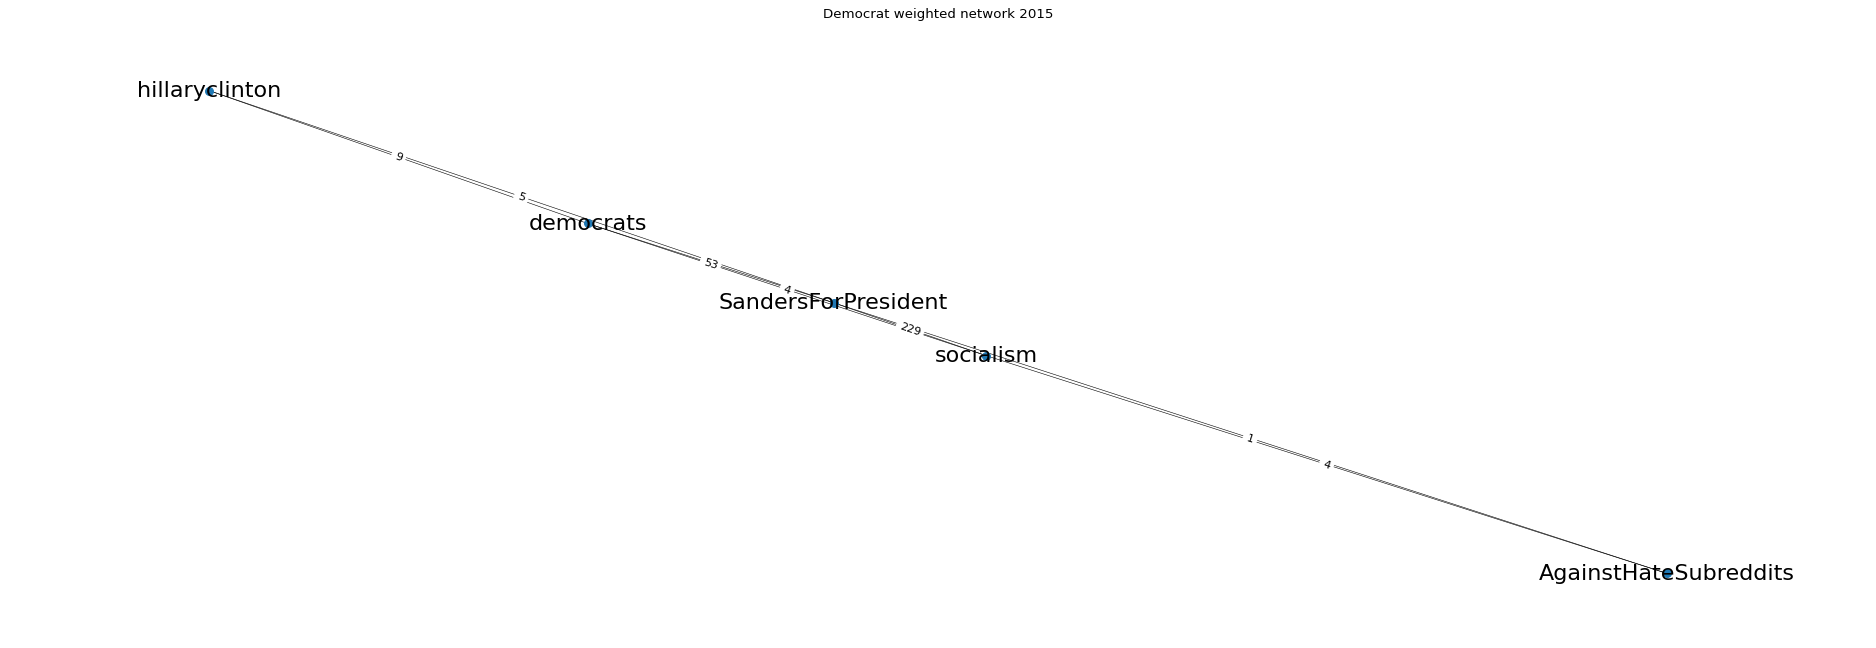

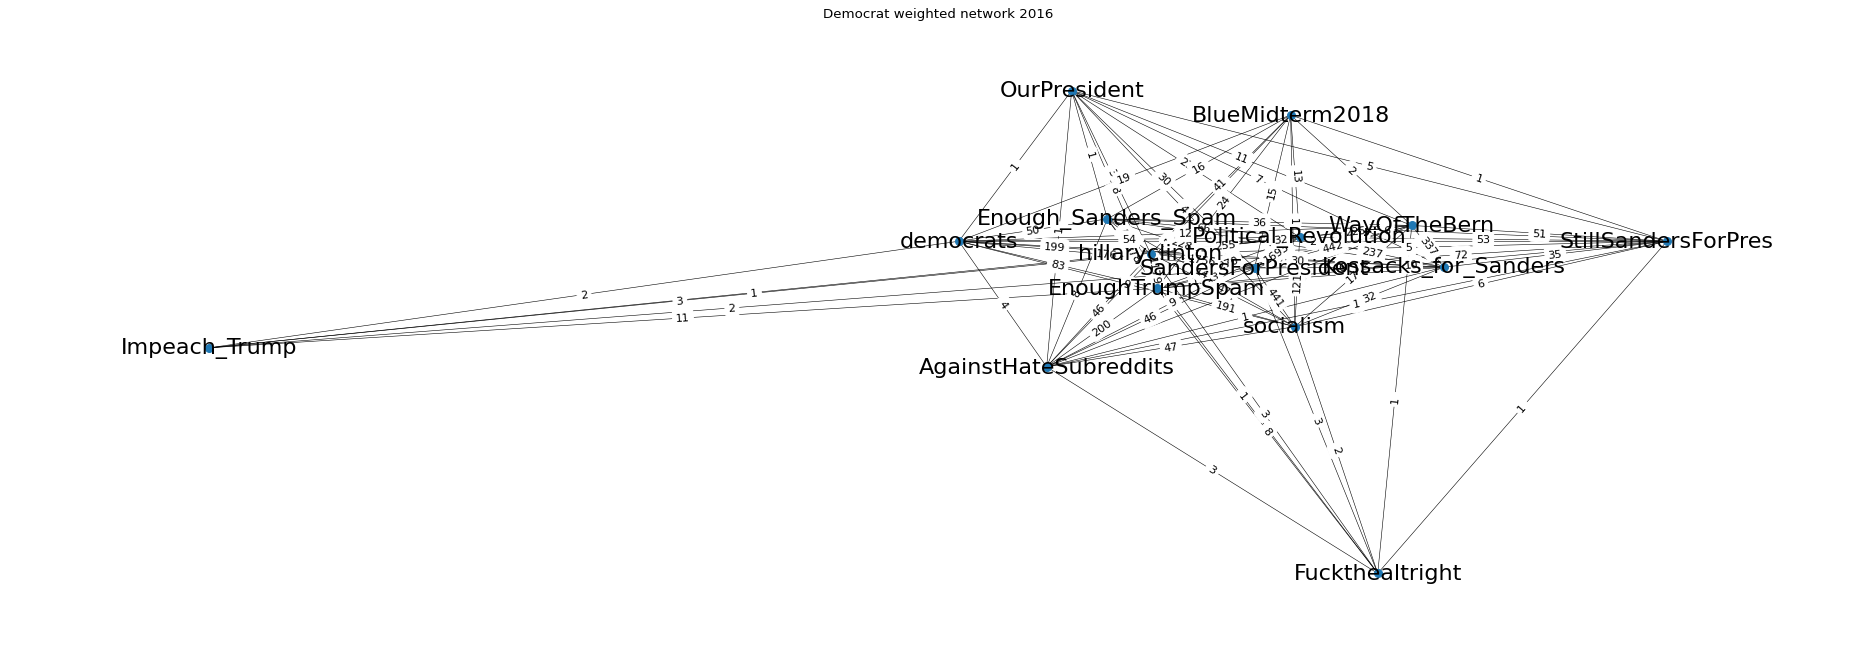

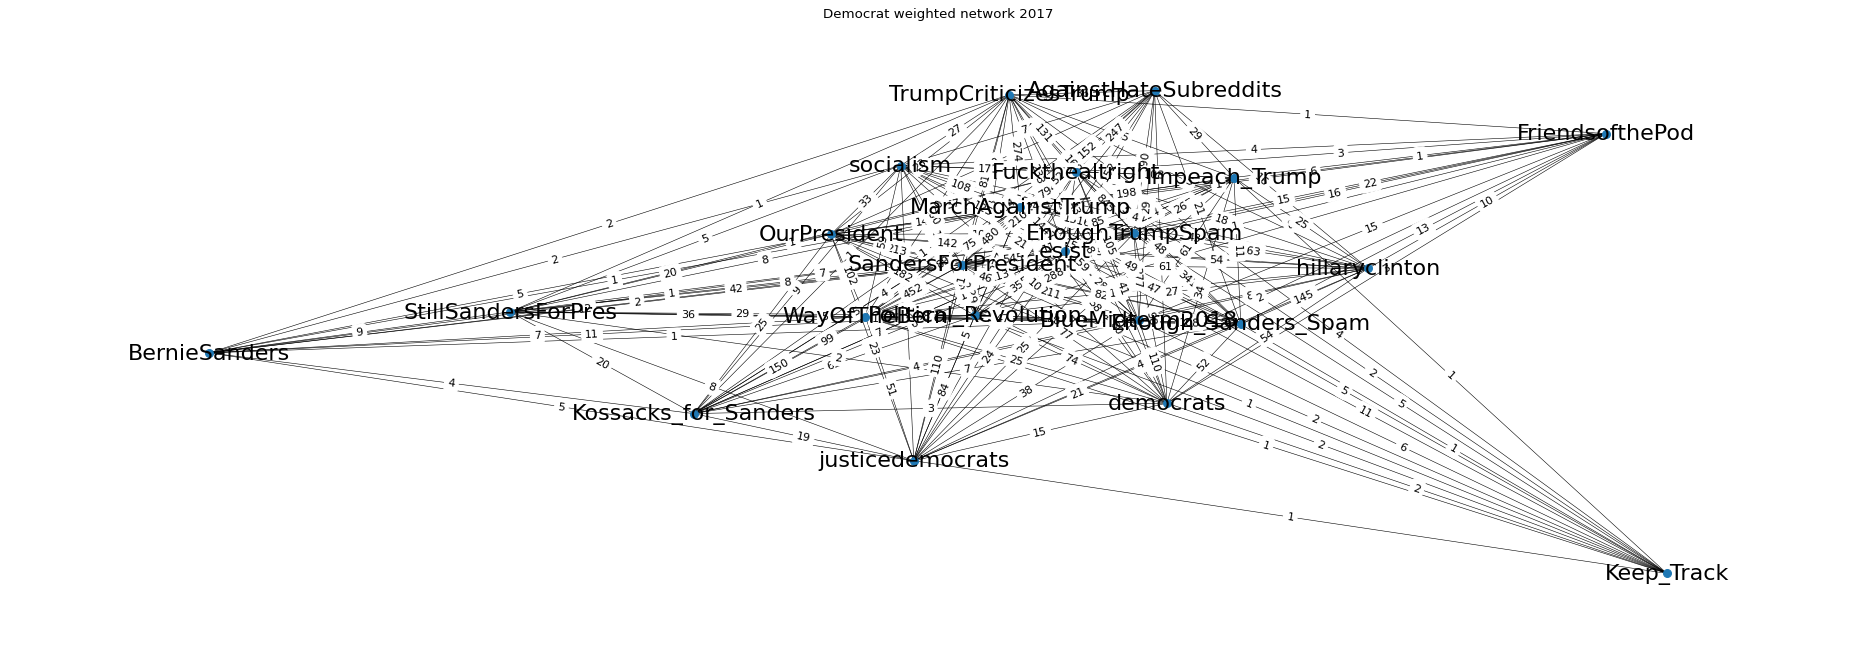

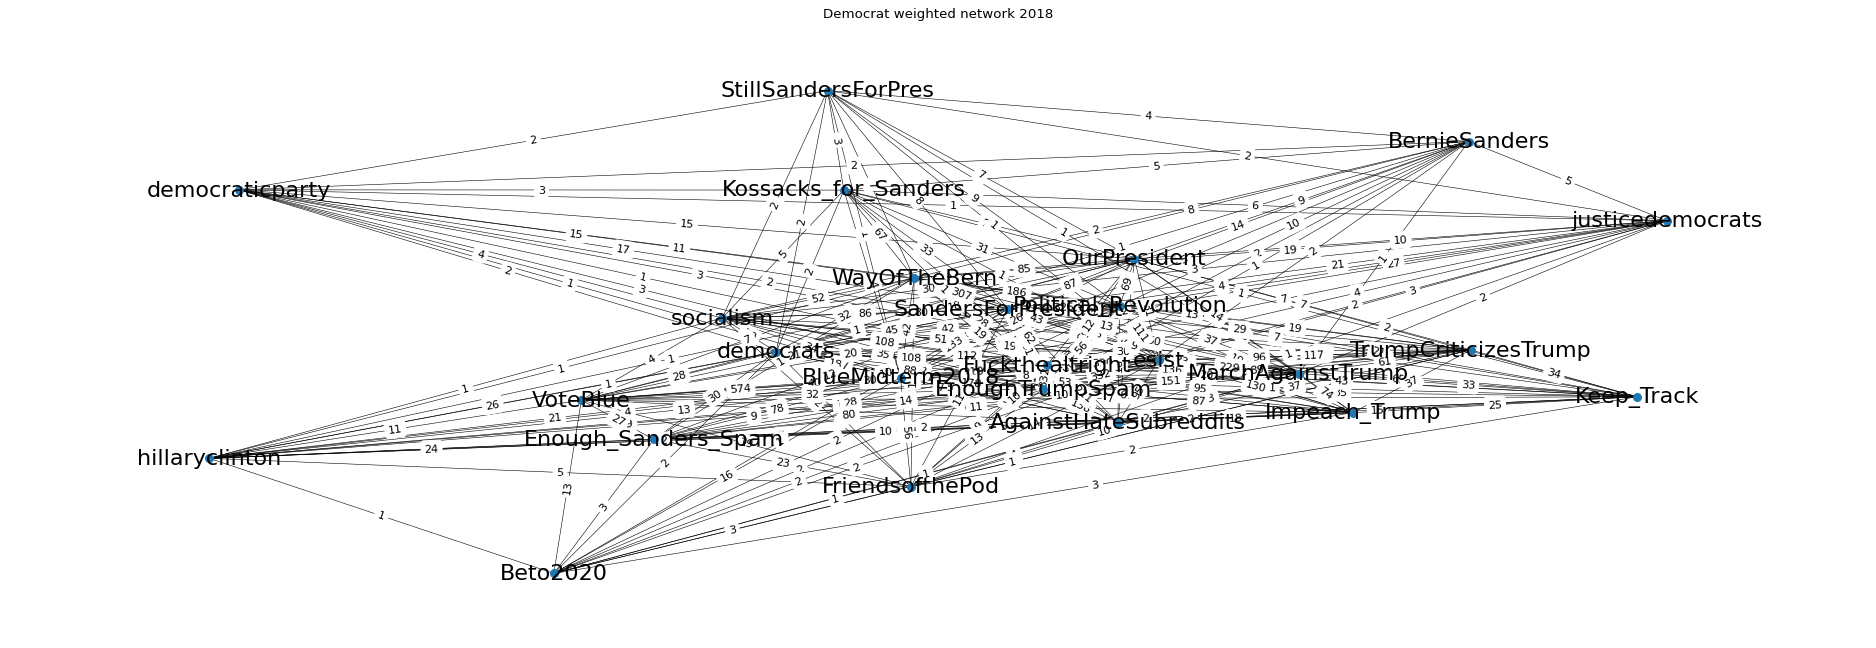

In [8]:
for year, dem_network_weighted in zip(YEARS, dem_networks_weighted):
    plt.figure(figsize=(30, 10), dpi=80)

    draw_network(
        dem_network_weighted,
        weighted=True,
        threshold=1,
    )

    plt.savefig(f"{FIGURES_DIR}/dem_network_{year}_weighted.pdf")

    plt.title(f"Democrat weighted network {year}")

    plt.show()


In [9]:
for year, rep_network_weighted in zip(YEARS, rep_networks_weighted):

    rep_subreddits_weighted = set(rep_network_weighted.nodes())

    print("Total", len(rep_subreddits_weighted))

    with open(
        f"{METADATA_DIR}/rep_subreddits_{year}_weighted.json",
        "w",
        encoding="utf-8",
    ) as f:
        json.dump(list(rep_subreddits_weighted), f)


Total 23
Total 34
Total 43
Total 44


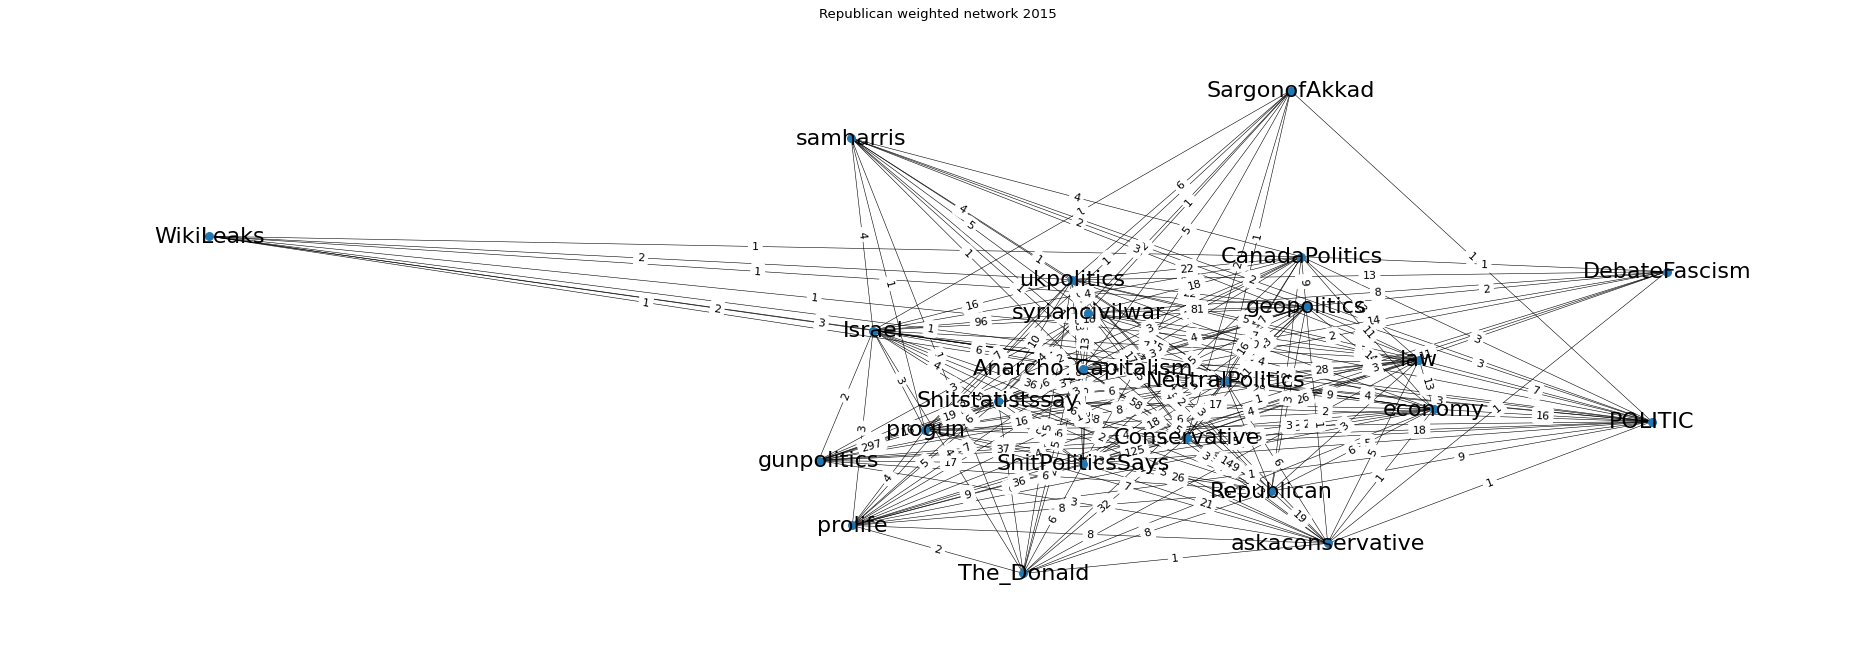

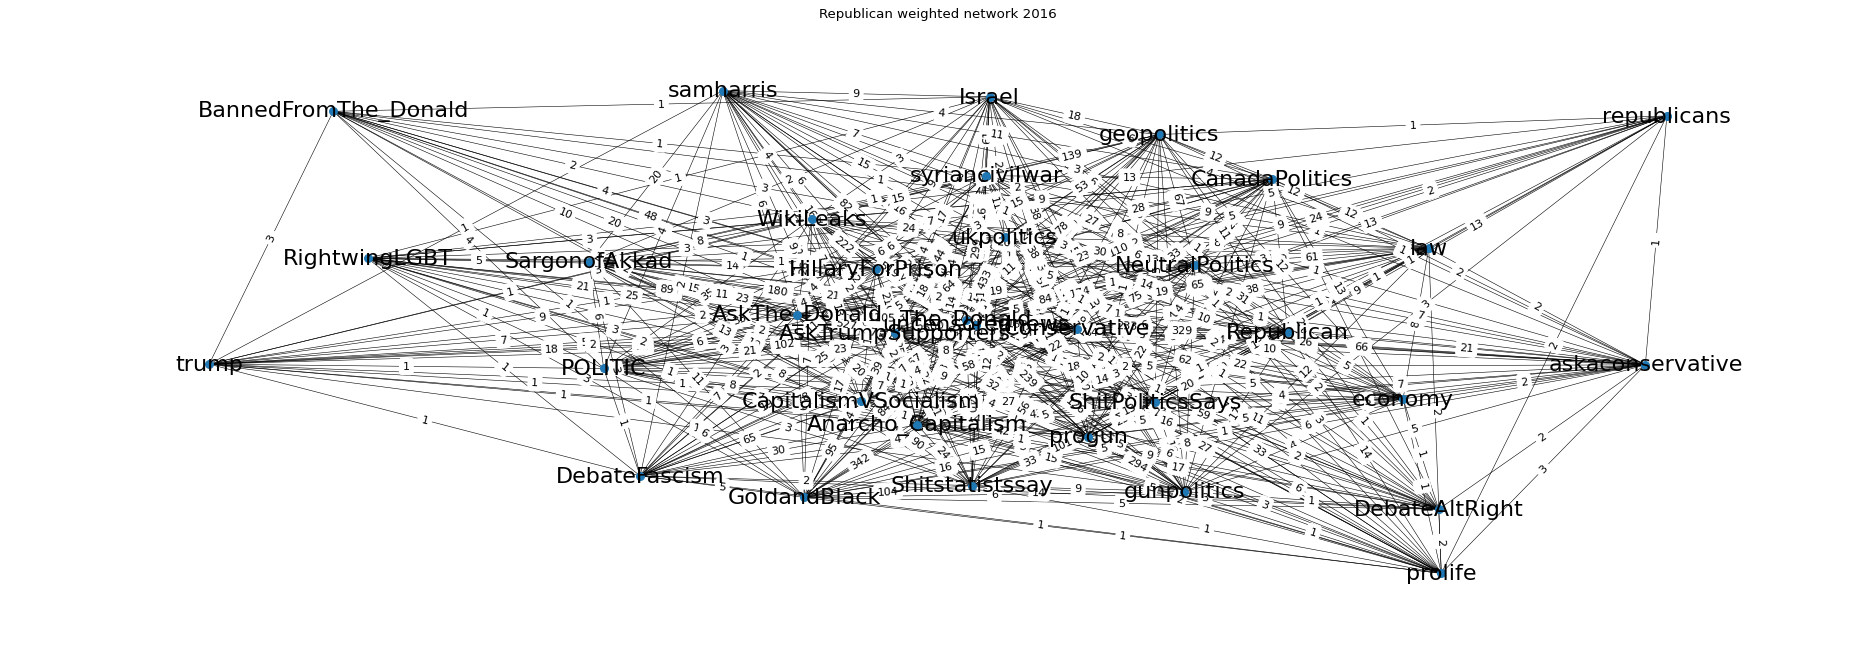

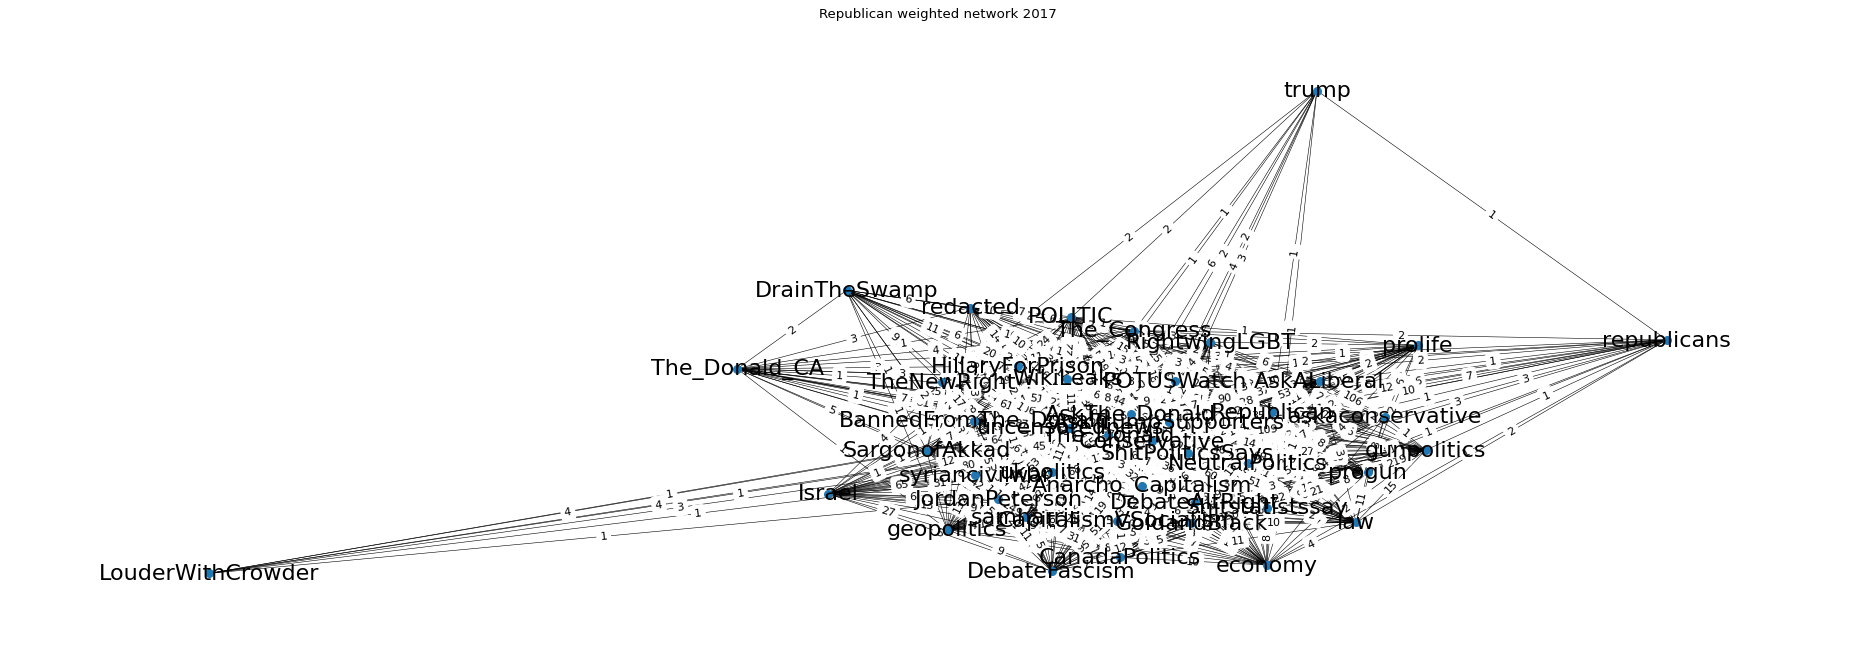

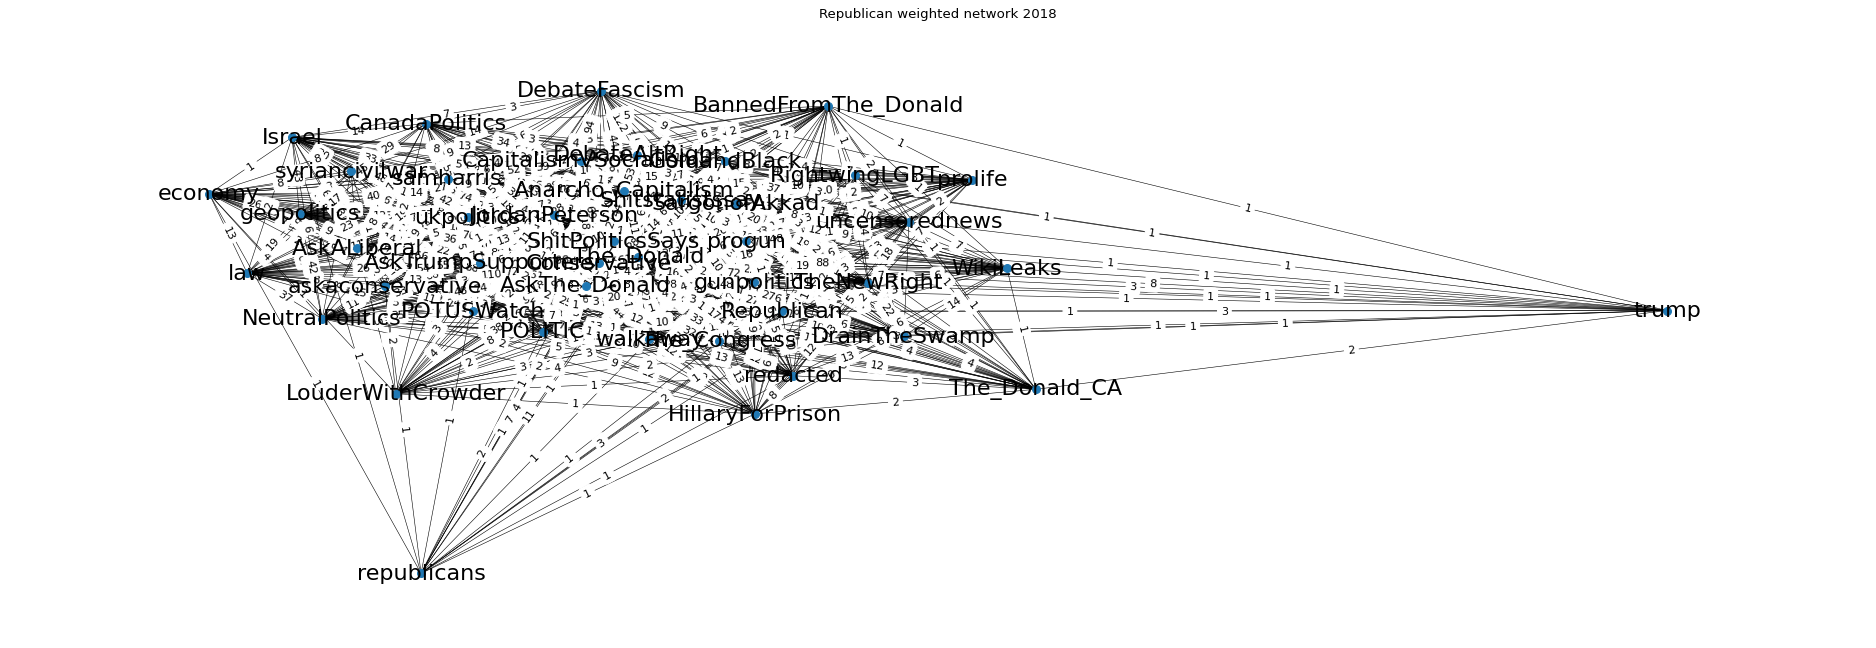

In [10]:
for year, rep_network_weighted in zip(YEARS, rep_networks_weighted):
    plt.figure(figsize=(30, 10), dpi=80)

    draw_network(
        rep_network_weighted,
        weighted=True,
        threshold=1,
    )

    plt.savefig(f"{FIGURES_DIR}/rep_network_{year}_weighted.pdf")

    plt.title(f"Republican weighted network {year}")

    plt.show()


### Unweighted

In [11]:
networks_unweighted = [load_network(year=year, weighted=False) for year in YEARS]


In [12]:
dem_networks_unweighted = []
rep_networks_unweighted = []

for network_unweighted in networks_unweighted:

    active_subreddits = set(network_unweighted.nodes())

    dem_active_subreddits = dem_subreddits & active_subreddits
    rep_active_subreddits = rep_subreddits & active_subreddits

    dem_network_unweighted = nx.subgraph_view(  # type: ignore
        network_unweighted,
        filter_node=lambda node: filter_node(
            node,
            network=network_unweighted,
            party_subreddits=dem_active_subreddits,
            opposition_subreddits=rep_active_subreddits,
            weighted=False,
        ),
    )
    dem_networks_unweighted.append(dem_network_unweighted)

    rep_network_unweighted = nx.subgraph_view(  # type: ignore
        network_unweighted,
        filter_node=lambda node: filter_node(
            node,
            network=network_unweighted,
            party_subreddits=rep_active_subreddits,
            opposition_subreddits=dem_active_subreddits,
            weighted=False,
        ),
    )

    rep_networks_unweighted.append(rep_network_unweighted)


In [13]:
for year, dem_network_unweighted in zip(YEARS, dem_networks_unweighted):

    dem_subreddits_unweighted = set(dem_network_unweighted.nodes())

    print("Total", len(dem_subreddits_unweighted))

    with open(
        f"{METADATA_DIR}/dem_subreddits_{year}_unweighted.json",
        "w",
        encoding="utf-8",
    ) as f:
        json.dump(list(dem_subreddits_unweighted), f)


Total 12
Total 27
Total 44
Total 55


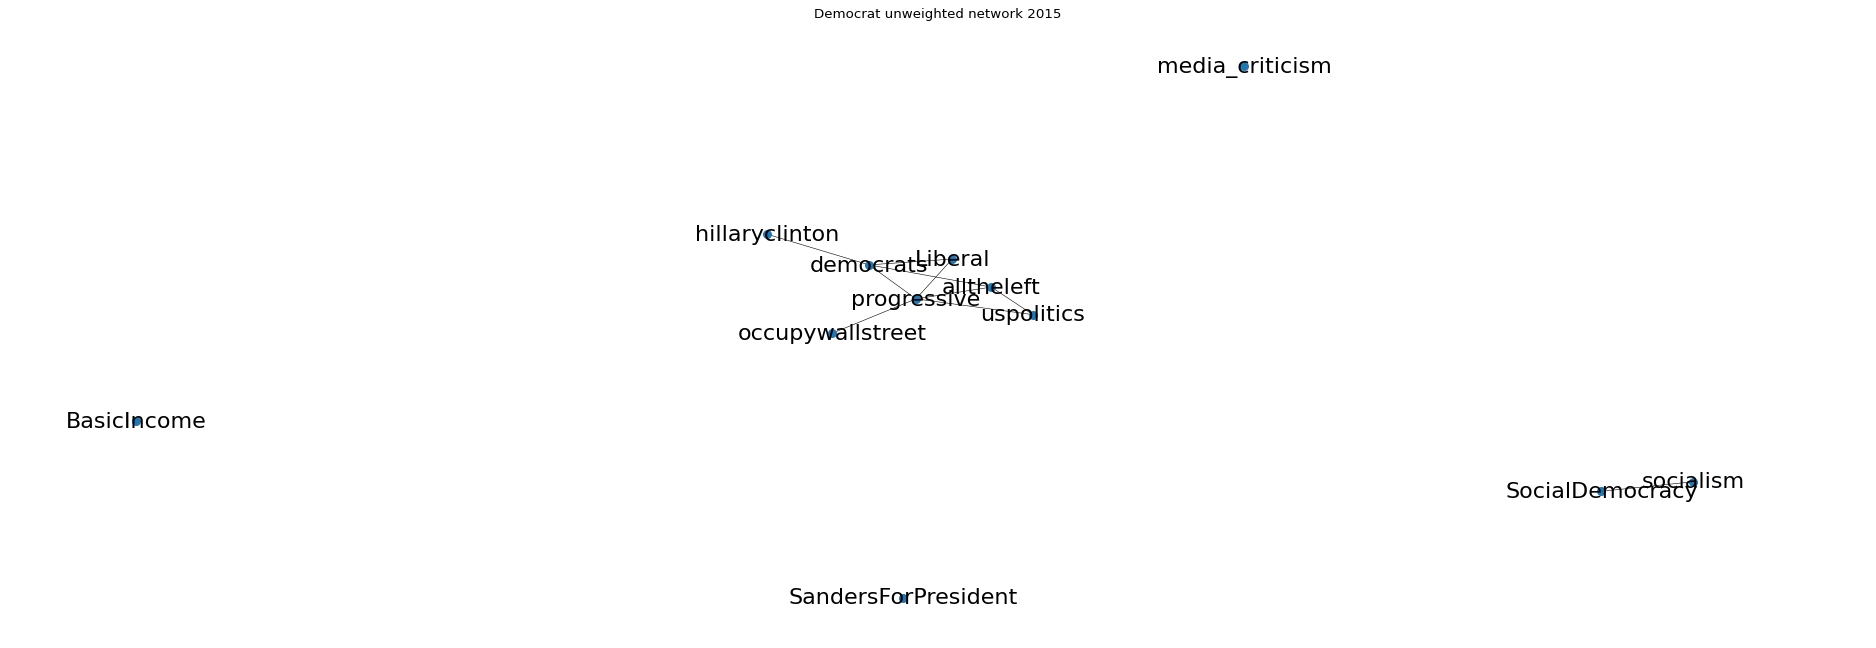

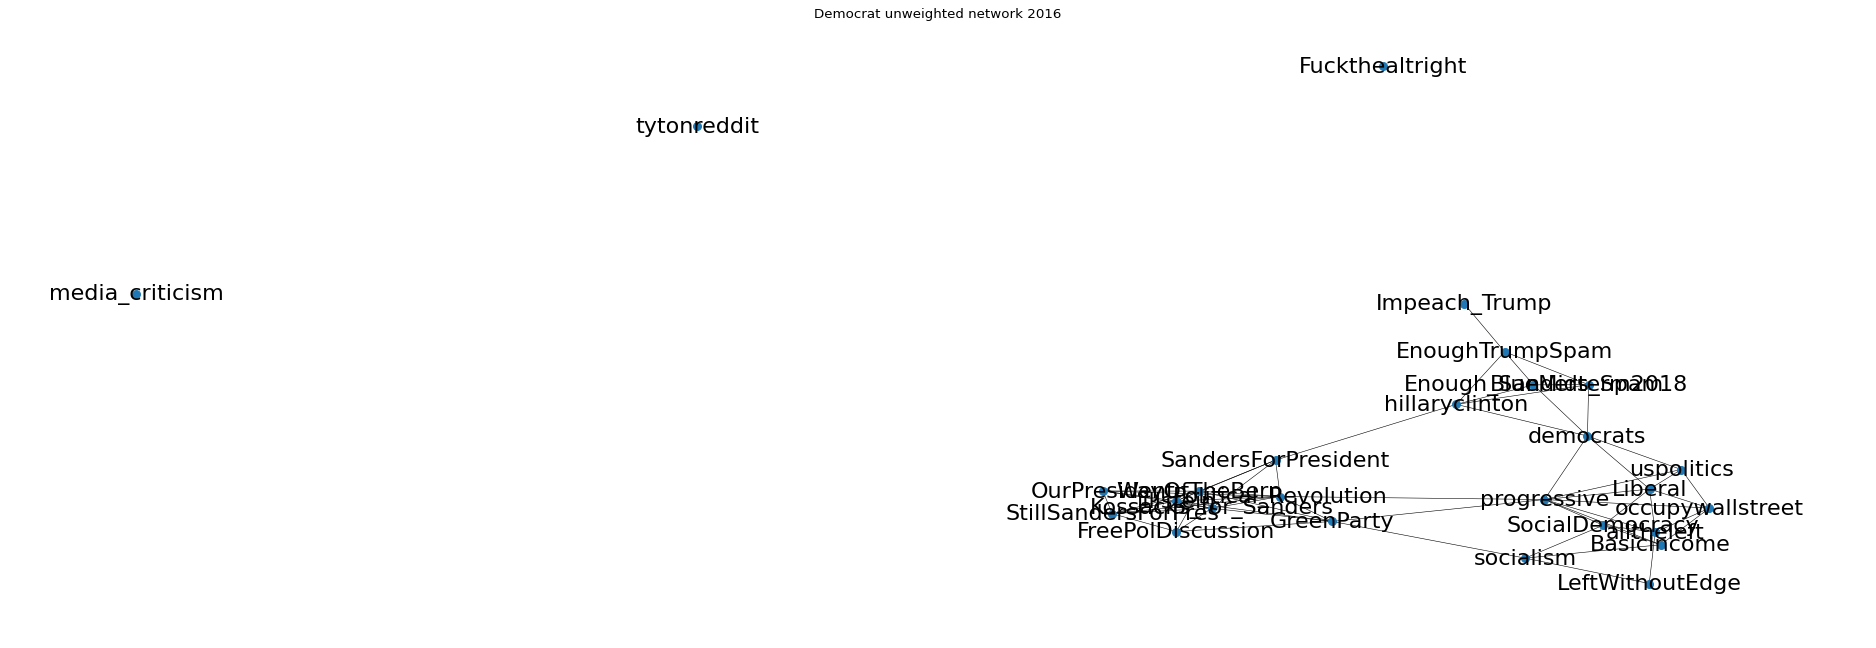

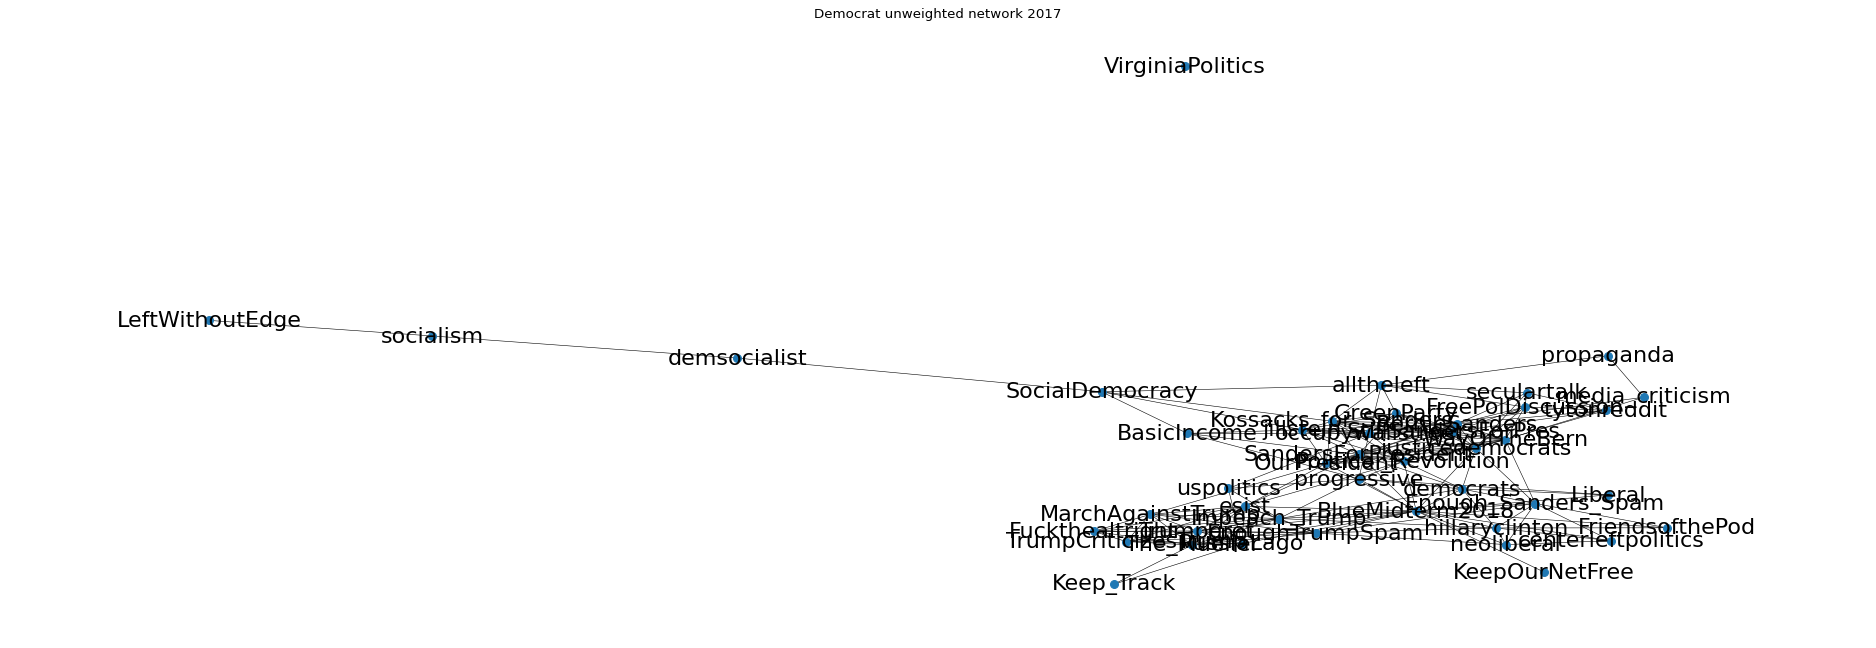

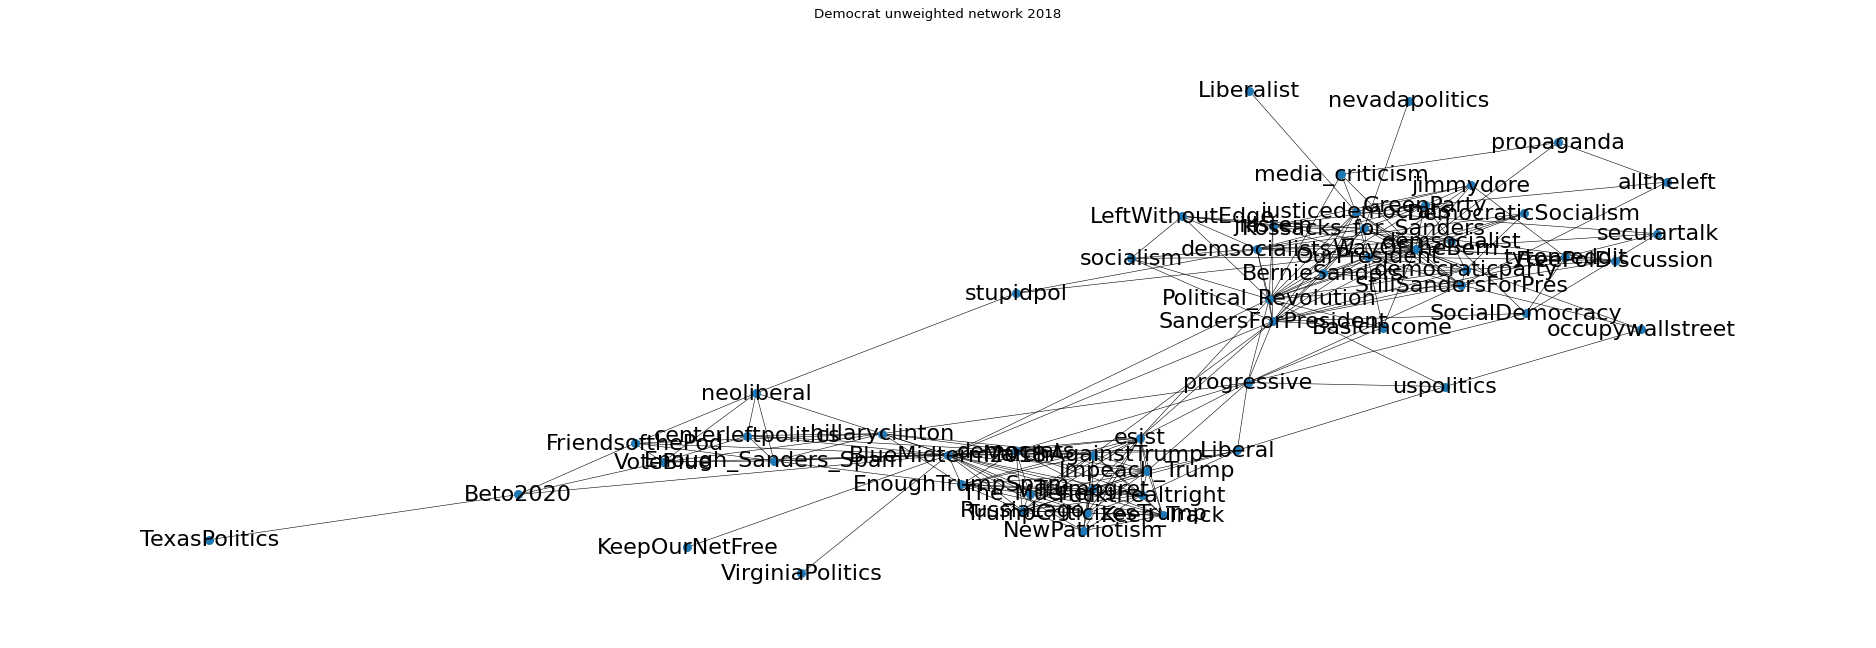

In [14]:
for year, dem_network_unweighted in zip(YEARS, dem_networks_unweighted):
    plt.figure(figsize=(30, 10), dpi=80)

    draw_network(
        dem_network_unweighted,
        weighted=False,
    )

    plt.savefig(f"{FIGURES_DIR}/dem_network_{year}_unweighted.pdf")

    plt.title(f"Democrat unweighted network {year}")

    plt.show()

In [15]:
for year, rep_network_unweighted in zip(YEARS, rep_networks_unweighted):

    rep_subreddits_unweighted = set(rep_network_unweighted.nodes())

    print("Total", len(rep_subreddits_unweighted))

    with open(
        f"{METADATA_DIR}/rep_subreddits_{year}_unweighted.json",
        "w",
        encoding="utf-8",
    ) as f:
        json.dump(list(rep_subreddits_unweighted), f)


Total 21
Total 31
Total 44
Total 53


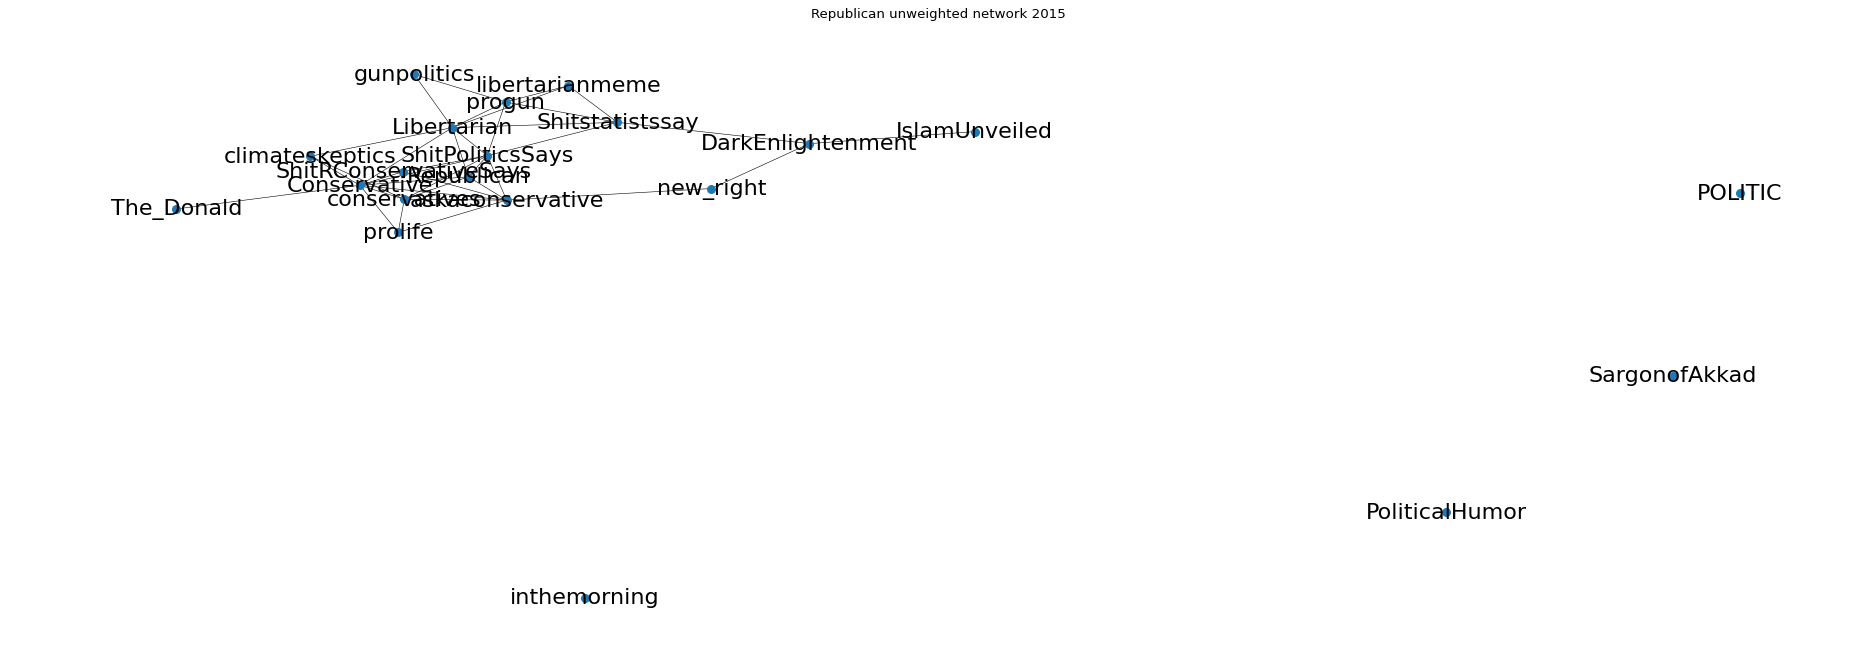

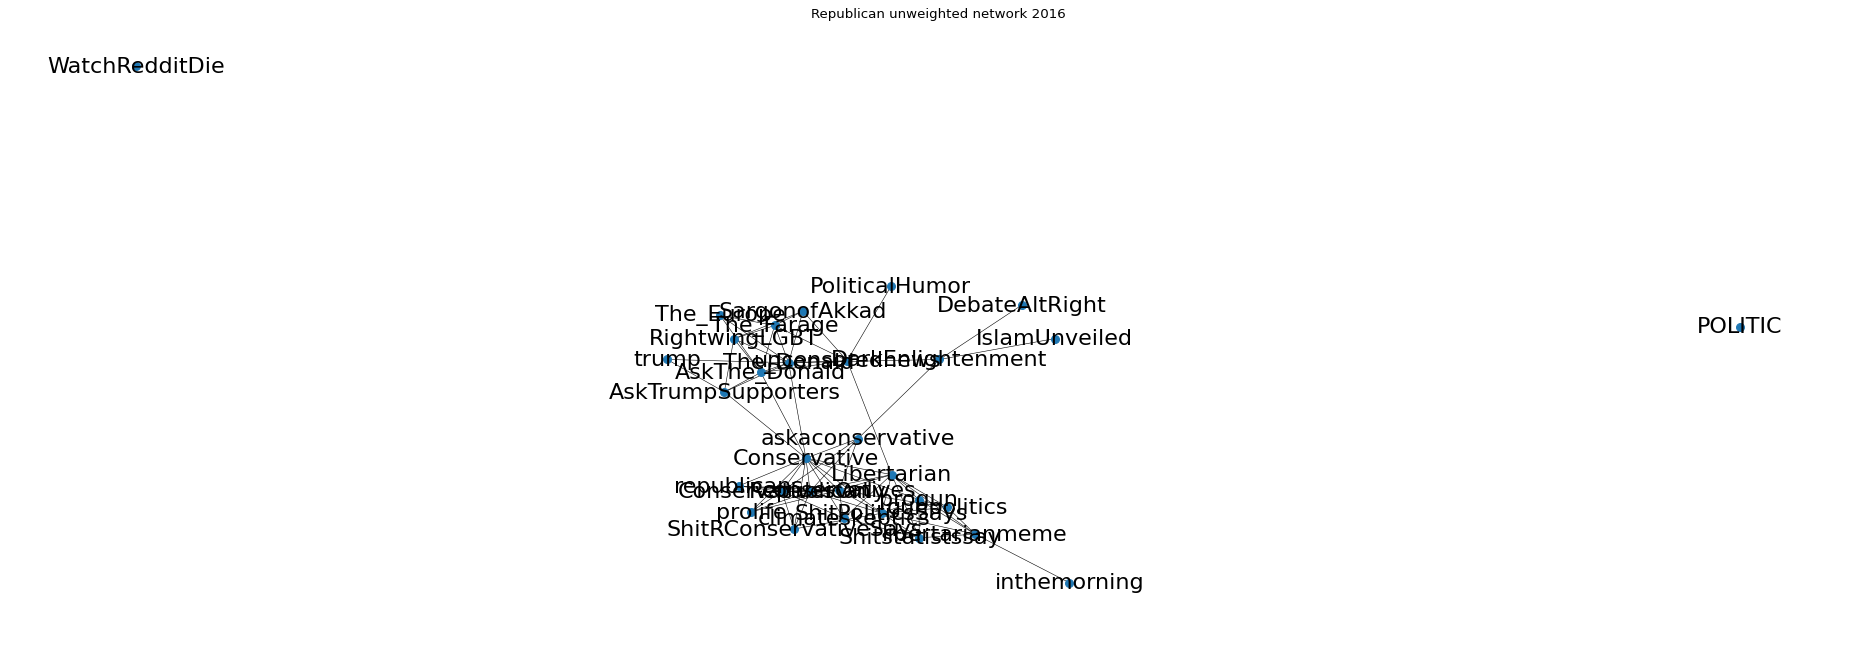

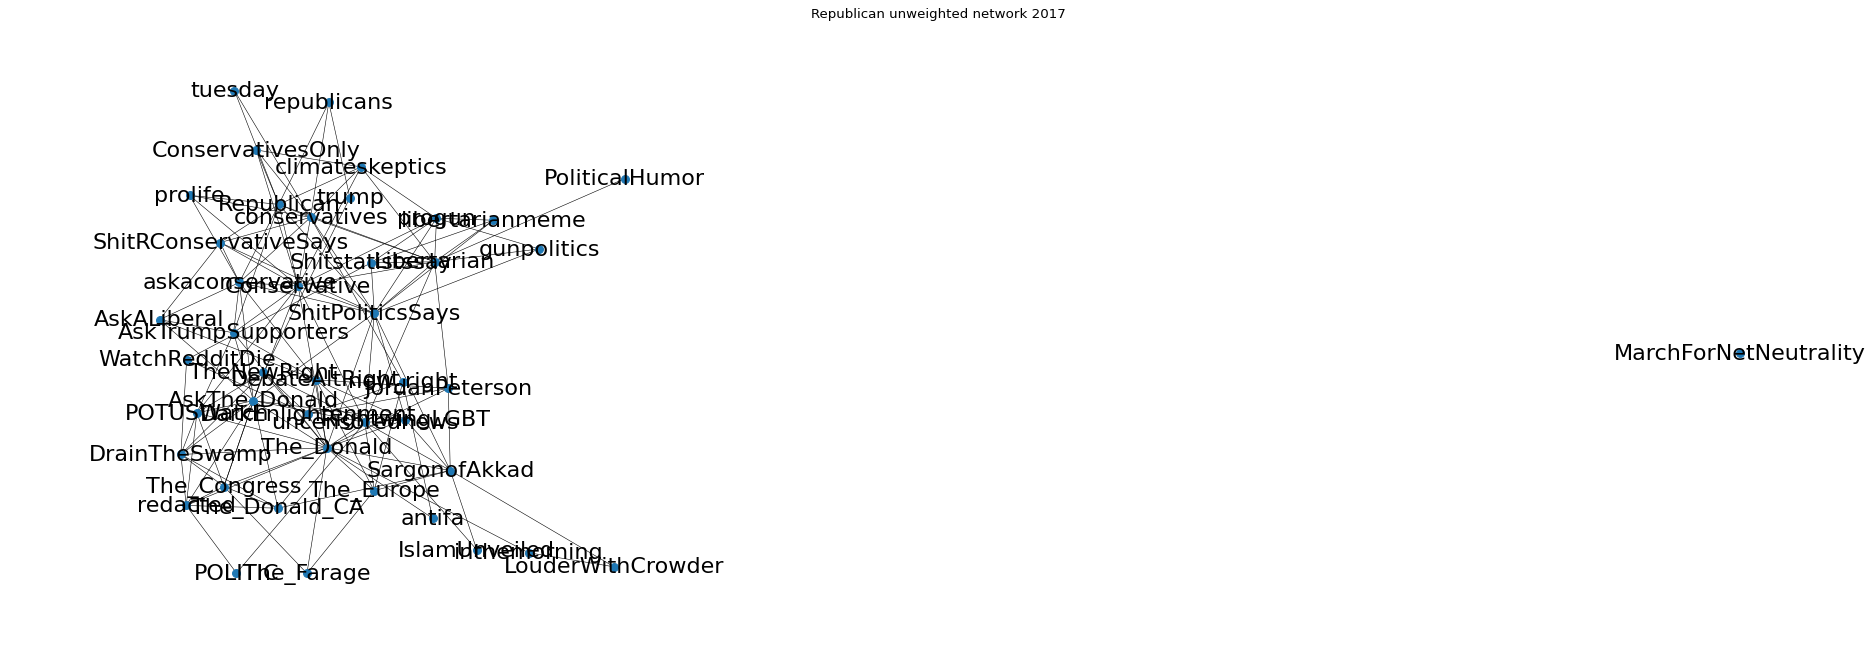

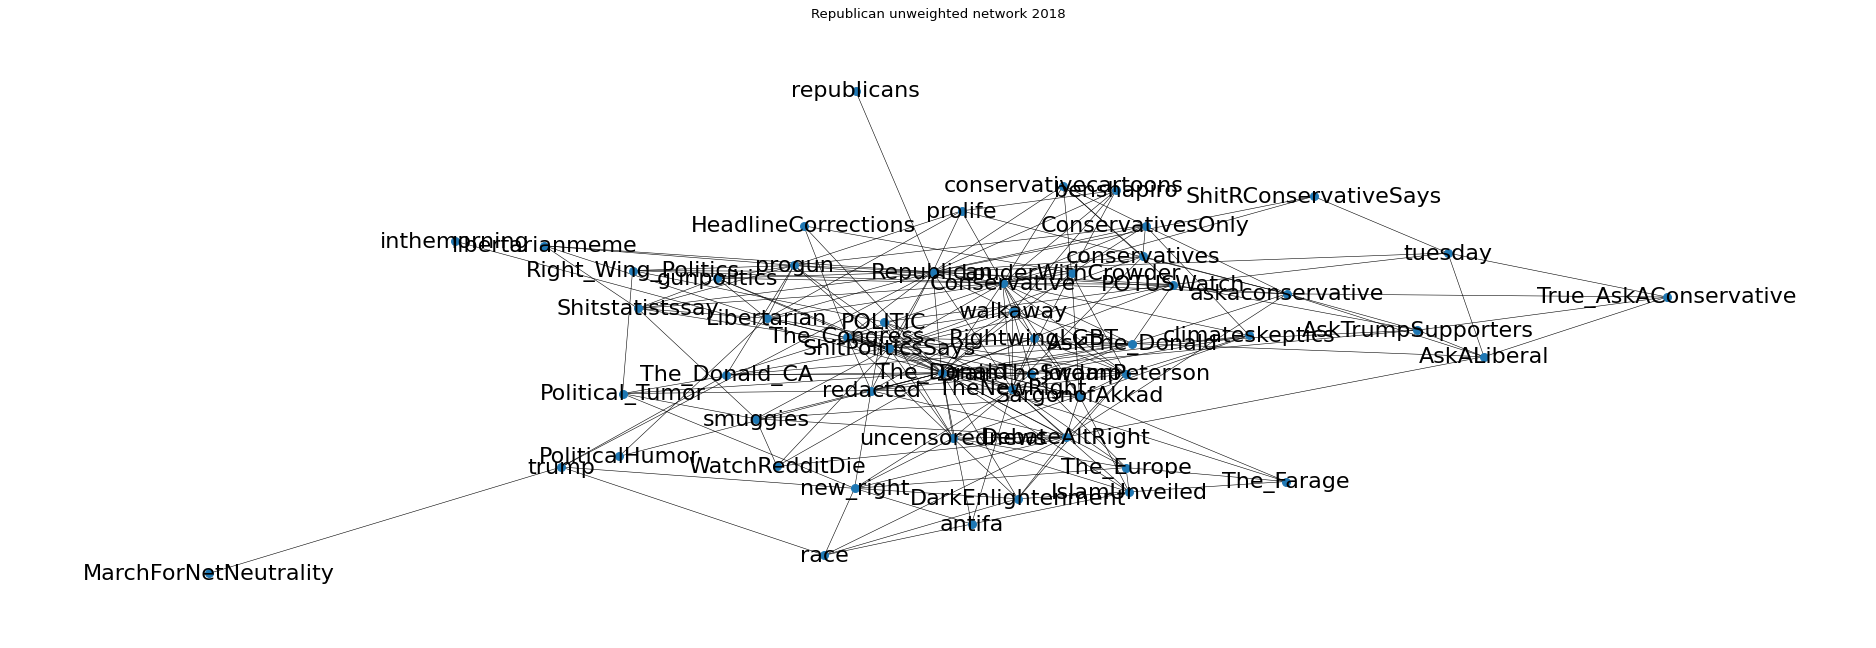

In [16]:
for year, rep_network_unweighted in zip(YEARS, rep_networks_unweighted):
    plt.figure(figsize=(30, 10), dpi=80)

    draw_network(
        rep_network_unweighted,
        weighted=False,
    )

    plt.savefig(f"{FIGURES_DIR}/rep_network_{year}_unweighted.pdf")

    plt.title(f"Republican unweighted network {year}")

    plt.show()
